In [52]:
import pandas as pd

In [53]:
#Read Data Set File into df
df = pd.read_csv("monthly-milk-production-pounds-p.csv")

In [54]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [55]:
# To get Dataset information(Number of rows & Columns) we use below method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
Month                                                       169 non-null object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    168 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [56]:
#for our convience we will change column name as Date And value
df.rename(columns={"Month": "Date", "Monthly milk production: pounds per cow. Jan 62 ? Dec 75": "Value"},inplace=True)


In [57]:
#Here we see last row contain some unknow(NaN) data ... So remove it by using dropna() method

df.drop(168,axis=0,inplace=True) #axis 0 for row and 1 for column

In [58]:
df

,Date,Value
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


In [59]:
# first see data type of "Date" column using df.info() ... its Object ...so we have to 
# change it into datetime 
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
Date     168 non-null datetime64[ns]
Value    168 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [60]:
#Now we have to set Date as Index 
df.set_index('Date', inplace=True)

In [61]:
df.head()

,Value
Date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [62]:
#to see our data in time series 
ts = df['Value']

In [63]:
ts[:5] 

Date
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
Name: Value, dtype: float64

In [64]:
#TO visualise data
import matplotlib.pyplot as plt
%matplotlib inline

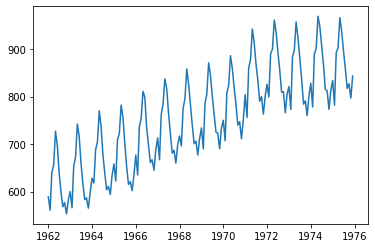

In [65]:
plt.plot(ts)
plt.show()

In [66]:
# to check weekly data but here our data is avilable in monthly basis
#ts_week = ts.resample('w').mean()
#ts_week

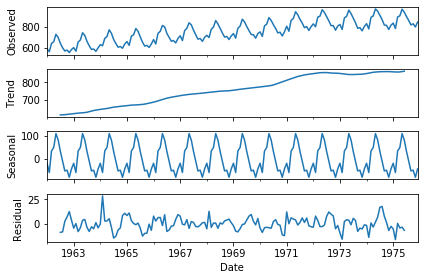

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts,freq=12)
fig = decompose.plot()

We call data is staionary only when mean and std is constant over a period of time

In [67]:
def test_stationarity(timeseries):
    rolemean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    orig = plt.plot(timeseries, color='blue',label='Original')
    meanplt = plt.plot(rolemean, color='red',label='Rolling Mean')
    stdplt = plt.plot(rolstd, color='green', label='Rolling Std') 
    plt.legend(loc='best')
    plt.show()

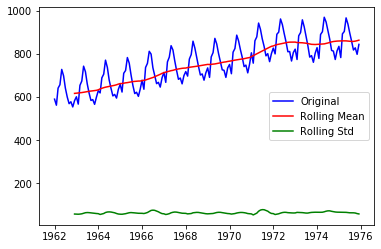

In [68]:
test_stationarity(ts)

As looking to the above graph it is clear that data is not stationary ...

There are two ways to create data stationary 

1] adfuller: from statsmodels.tsa.stattools import adfuller[Augmented Dicky-Fuller Test]

2] taking log of given data i.e mathematical differnciation 

In [69]:
import numpy as np
ts_log = np.log(ts)

In [70]:
#differnciate 
ts_log_diff= ts_log - ts_log.shift()

In [71]:
ts_log_diff.dropna(inplace=True)


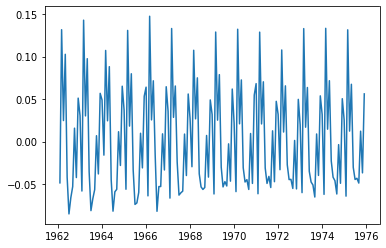

In [72]:
plt.plot(ts_log_diff)

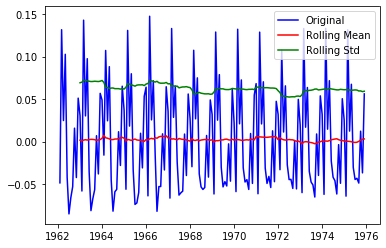

In [73]:
test_stationarity(ts_log_diff)

In [74]:
train = ts_log[:-15]#Except last 15 all other
test = ts_log[-15:]#Last 15 rows

In [75]:
history = [x for x in train]

In [87]:
d=1

In [76]:
#prediction = []

In [77]:
#pip install statsmodel

In [78]:
from statsmodels.tsa.arima_model import ARIMA

In [89]:
prediction = []
for t in range(len(test)):
    model = ARIMA(history,order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(float(yhat))
    obs = test[t]
    history.append(obs)
    print("predicted value=",np.exp(yhat),"Expected Value=",np.exp(obs))

predicted value= [842.47684387] Expected Value= 812.0
predicted value= [814.19350908] Expected Value= 773.0000000000003
predicted value= [775.33904935] Expected Value= 812.9999999999997
predicted value= [812.47777918] Expected Value= 834.0000000000001
predicted value= [834.26859138] Expected Value= 782.0000000000001
predicted value= [784.90043753] Expected Value= 892.0000000000002
predicted value= [888.08673985] Expected Value= 903.0
predicted value= [903.79608034] Expected Value= 965.9999999999997
predicted value= [964.97369153] Expected Value= 936.9999999999999
predicted value= [939.90197362] Expected Value= 895.9999999999999
predicted value= [899.33563098] Expected Value= 858.0000000000001
predicted value= [860.94423666] Expected Value= 817.0000000000001
predicted value= [819.75161733] Expected Value= 826.9999999999999
predicted value= [827.74564206] Expected Value= 797.0000000000001
predicted value= [799.14855491] Expected Value= 843.0


In [90]:
prediction

[6.736346176825363,
 6.7021980638962,
 6.653300416712158,
 6.700088565126729,
 6.726555402529542,
 6.665556878561525,
 6.789069418231686,
 6.806603760101394,
 6.872100838301218,
 6.845775586442205,
 6.801656302926621,
 6.758029736543004,
 6.709001388674105,
 6.718705911615602,
 6.683546854524126]

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction,test)

0.002981143557545261

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

https://machinelearningmastery.com/time-series-data-stationary-python/